<a href="https://colab.research.google.com/github/robinmkc/Coursera_Capstone/blob/main/data_scientist_capstone_week4_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco House Price vs Venues near by 

In the past few years, the housing price is booming in many US cities.    There are many reason which is causing the housing price to increase, but the objective of this study is to find out the house price difference between different zipcodes in the same city.    The audience of this study is any potential home buyer.   They may want to find out if any good bargin in a particular zipcode if that zipcode still has low price with good venus near by.   

This study will use the housing price per square feet for different zipcodes in  San Francisco and compare with top venues in zipcode.     

# Week4 Part1
The followings are the steps for week4 part 1 project:

1.  use BeautifulSoup to get the zipcode and neighborhood name from the web.
2.  use geolocator.geocode to get latitude and longitude for each zipcode.
3.  use folium.Map to create a San Francisco map with blue dot for 20 zipcodes.



In [ ]:
!pip install bs4

Import pandas, requests, and BeautifulSoup

In [ ]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 


Create Data Frame for San Francisco Zip code with Neighborhood and Population Info

In [ ]:

url = 'http://www.healthysf.org/bdi/outcomes/zipmap.htm'
req = requests.get(url) 
soup = BeautifulSoup(req.content, 'html.parser')
data = []
table = soup.find_all('table')[3]
#print(table)
table_body = table.find('tbody')
print(table_body)

rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if(isinstance(cols, list) and len(cols) > 2):
        #Check if Borough is not assigned
        if('Zip' in cols[0] or '94110' in cols[0]):
            #Borough is not assigned.
            #Skip appending
            pass
        else:
            #Keep row if Borough is assigned.
            #If a cell has a borough but a Not assigned neighborhood, 
            #then the neighborhood will be the same as the borough.

            cols[1] = cols[1].split(r'/')[0]
            cols[1] = cols[1].split(r'-')[0]
            data.append([ele for ele in cols if ele]) # Get rid of empty values

sf_df=pd.DataFrame(data)
sf_df.columns =['PostalCode', 'Neighborhood', 'Population']

sf_df['Neighborhood']=sf_df['Neighborhood'].str.replace(r'\n', r'')
sf_df['Population']=sf_df['Population'].str.replace(r',', r'')
"""

#df.columns =['PostalCode', 'Borough', 'Neighborhood']
df['Borough']=df['Borough'].replace({'Downtown sfStn A PO Boxes25 The Esplanade':'Downtown sf Stn A',
                                             'East sfBusiness reply mail Processing Centre969 Eastern':'East sf Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast sf':'East York/East sf',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

"""
sf_df

None


,PostalCode,Neighborhood,Population
0,94102,Hayes Valley,28991
1,94103,South of Market,23016
2,94107,Potrero Hill,17368
3,94108,Chinatown,13716
4,94109,Polk,56322
5,94112,Ingelside,73104
6,94114,Castro,30574
7,94115,Western Addition,33115
8,94116,Parkside,42958
9,94117,Haight,38738


From table_contents, find table and convert data to pandas dataframe base on the requirements

Read number of rows and columns from dataframe

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import time

print('Libraries imported.')

Libraries imported.


In [ ]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.419906.


In [ ]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
def get_location_latitude(row):
    for i in range(3):
        try:
            PostalCode = row['PostalCode']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode("CA " + PostalCode)
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return latitude
        except:
            Neighborhood = row['Neighborhood']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(Neighborhood + ", San Francisco")
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return latitude
def get_location_longitude(row):

    for i in range(3):
        try:
            PostalCode = row['PostalCode']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode("CA " + PostalCode)
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return longitude
        except:
            Neighborhood = row['Neighborhood']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(Neighborhood + ", San Francisco")
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return longitude

sf_df['Latitude'] = sf_df.apply(get_location_latitude, axis=1)
sf_df['Longitude'] = sf_df.apply(get_location_longitude, axis=1)
# clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

sf_df.head(22)


,PostalCode,Neighborhood,Population,Latitude,Longitude
0,94102,Hayes Valley,28991,37.786661,-122.408450
1,94103,South of Market,23016,37.774483,-122.411044
2,94107,Potrero Hill,17368,37.789529,-122.406086
3,94108,Chinatown,13716,37.791091,-122.406587
4,94109,Polk,56322,37.793867,-122.420471
5,94112,Ingelside,73104,37.722877,-122.445160
6,94114,Castro,30574,37.761495,-122.436666
7,94115,Western Addition,33115,37.784410,-122.435644
8,94116,Parkside,42958,37.746330,-122.473219
9,94117,Haight,38738,37.776998,-122.431240


In [ ]:
# create map of New York using latitude and longitude values
sf_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, PostalCode, neighborhood in zip(sf_df['Latitude'], sf_df['Longitude'], sf_df['PostalCode'], sf_df['Neighborhood']):
    print(PostalCode, neighborhood, lat, lng)
    label = '{}, {}'.format(neighborhood, PostalCode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sf_map)  

sf_map

94102 Hayes               Valley 37.7866611 -122.40844963443767
94103 South               of Market 37.774482682084866 -122.41104374562194
94107 Potrero               Hill 37.78952862758635 -122.4060862325324
94108 Chinatown 37.79109140511726 -122.40658733533844
94109 Polk 37.793866999676275 -122.42047103982021
94112 Ingelside 37.722877497444586 -122.4451601817335
94114 Castro 37.76149452092264 -122.43666599783904
94115 Western               Addition 37.78441041175344 -122.43564417808464
94116 Parkside 37.74633036752839 -122.47321929282748
94117 Haight 37.7769975 -122.4312396041318
94118 Inner               Richmond 37.7787208 -122.45508535902061
94121 Outer               Richmond 37.77855176507084 -122.49227982208976
94122 Sunset 37.761046477964825 -122.4720238204484
94123 Marina 37.798967238491294 -122.43022551862445
94124 Bayview 37.745719598780454 -122.39547461815316
94127 St.               Francis Wood 37.739607482336936 -122.46528435763148
94131 Twin               Peaks 37.75464 

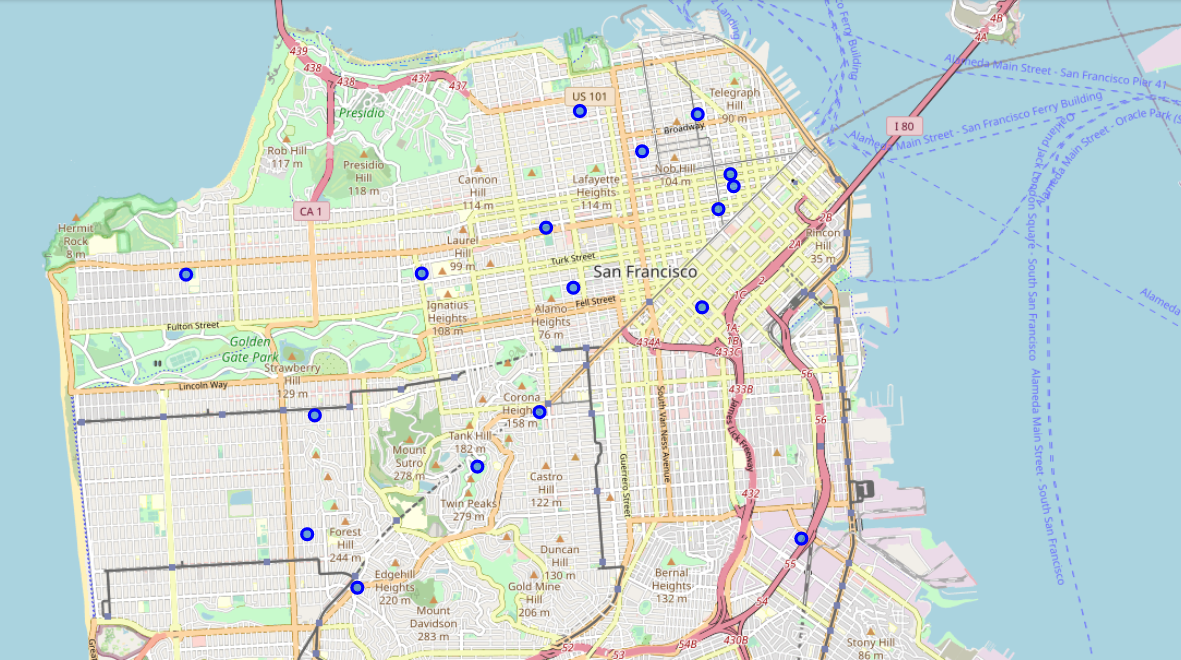

Visualing San Francisco with different zipcodes on the map. We are done with part 1 of week 4. 